# Tabular Kaggle Project

For Friday March 8 you must submit your first attempt at the Kaggle Project in the form of a notebook.  Need to see:


## Define Project

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression? 


## Project Definition

Steel Plate Defect Prediction
* https://www.kaggle.com/competitions/playground-series-s4e3/overview

* The challenge is to "predict the probability of each of the 7 binary targets" according to the competion page. This means that the challenge is a supervised 7-way multiclass classification problem.

* The project gives a synthetic training dataset of 19219 cases with 34 columns, 27 of which are features of defects, and the last 7 of which are each a binary encoded defect type. Both the train and test datasets were generated using a deep learning model based on the Steel Plates Faults dataset from UCI. Feature distributions of the synthetic datasets have been slightly altered from the original. 

* The type of Machine Learning is multi-class classification of 7 different classes.

## Data Loading and Initial Look

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 

* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
        
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [27]:
# Load the data

import numpy as np
import pandas as pd

df = pd.read_csv('../../../playground-series-s4e3/train.csv', index_col='id')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [2]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Count number of rows and features

num_rows, num_col = df.shape

print("Number of rows: ", num_rows)
print("Number of features: ", num_col-1)

Number of rows:  19219
Number of features:  33


In [4]:
# Check for missing values

missing_values = df.isnull().any()

# Print columns with missing values, if any
if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values])
else:
    print("No missing values in the dataset.",end="\n\n")
    
#data.info()

No missing values in the dataset.



In [5]:
# Table of column info

feature_info = []

# Detect outliers function
def idoutliers(column, dataset=df):
    # use IQR to ID possible outliers
    #float(column)
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lwr_bnd = Q1 - 1.5*IQR
    upr_bnd = Q3 + 1.5*IQR
    
    outliers = dataset[(dataset[column] < lwr_bnd) | (dataset[column] > upr_bnd)]
    
    return len(outliers)

# Iterate through each column dataset
for column in df.columns:
    # Determine feature type 
    if set(df[column].unique()) == {0,1}:
        feature_type = 'Cat'
        feature_values = [0,1]
        outliers = 0
    else:
        feature_type = 'Num'
        feature_values = f"{df[column].min()}-{df[column].max()}"
        outliers = idoutliers(column)

    # Count missing values
    missing_values = df[column].isnull().sum()
    # Append feature information to the list
    feature_info.append([column, feature_type, feature_values, missing_values, outliers])
# Create a DataFrame from the list of feature information
feature_table = pd.DataFrame(feature_info, columns=['Feature', 'Type', 'Vals', 'Miss Vals', 'Outliers'])

print(feature_table)

                  Feature Type            Vals  Miss Vals  Outliers
0               X_Minimum  Num          0-1705          0         0
1               X_Maximum  Num          4-1713          0         0
2               Y_Minimum  Num   6712-12987661          0      1118
3               Y_Maximum  Num   6724-12987692          0      1112
4            Pixels_Areas  Num        6-152655          0      3722
5             X_Perimeter  Num          2-7553          0      3717
6             Y_Perimeter  Num           1-903          0      2785
7       Sum_of_Luminosity  Num    250-11591414          0      3826
8   Minimum_of_Luminosity  Num           0-196          0       211
9   Maximum_of_Luminosity  Num          39-253          0      1292
10     Length_of_Conveyer  Num       1227-1794          0         0
11       TypeOfSteel_A300  Cat          [0, 1]          0         0
12       TypeOfSteel_A400  Cat          [0, 1]          0         0
13  Steel_Plate_Thickness  Num          40-300  

In [6]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

for i in target_cols:
    count = (df[i] == 1).sum()
    print(i,end='\n')
    print("Count = ",count,end='\n')
    print("Proportion = ",count/19219,end='\n\n')

Pastry
Count =  1466
Proportion =  0.07627868255372287

Z_Scratch
Count =  1150
Proportion =  0.059836620011447

K_Scatch
Count =  3432
Proportion =  0.17857328685155316

Stains
Count =  568
Proportion =  0.029554087101305998

Dirtiness
Count =  485
Proportion =  0.025235444091784173

Bumps
Count =  4763
Proportion =  0.24782767053436702

Other_Faults
Count =  6558
Proportion =  0.3412248295957126



Class distribution:
Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64
Class proportions:
Pastry          0.076279
Z_Scratch       0.059837
K_Scatch        0.178573
Stains          0.029554
Dirtiness       0.025235
Bumps           0.247828
Other_Faults    0.341225
dtype: float64


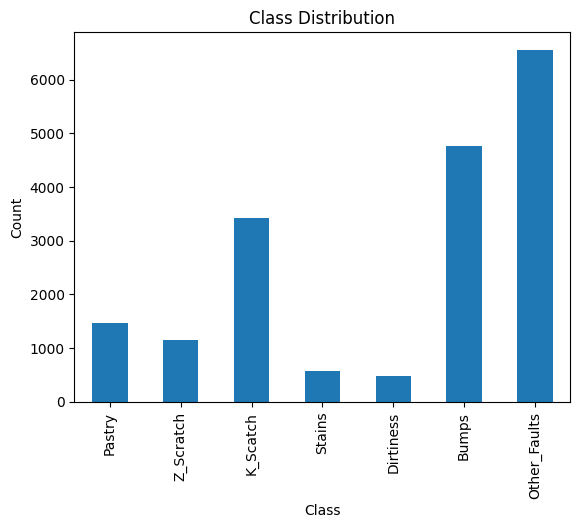

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution of each class
class_distribution = df[target_cols].sum()
print("Class distribution:")
print(class_distribution)

# Calculate the proportion of each class
class_proportions = df[target_cols].mean()
print("Class proportions:")
print(class_proportions)

# Visualize class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Class Imbalance
Based on the counts and proportions of the target features, the model might be prone to over emphasize K_Scatch, Bumps, and especially Other_Faults. This means that techniques will need to be employed to mitigate this potential bias. For this reason various different algorithms robust to class imbalance will be employed to compete with each other. the algorithms used will be RandomForest, AdaBoost, CatBoost, and LogisticRegression with class_weight='balanced'.
### Target encoding
The classification target is currently encoded as seven separate binary features ('Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'). This will need to be collapsed into a single one-hot encoded 7-way multiclass feature (0-6) for the sake of cleanliness and convienience.

In [36]:
# Check how many and what unique combinations are in the outputs.

np.unique(df.iloc[:,-7:], axis=0, return_counts=True)

(array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0]]),
 array([ 818, 6540, 4761,  485,  568, 3411,   18,    2, 1150, 1465,    1]))

We can see that of the 11 unique output combinations, there are 3 with multiple listed defects (18, 2, and 1 rows respectively). Because these instances are so rare and appear to be K Scatch errors, we can consider them outliers. In addition to the multiple outputs, there is one unique output with no listed defects. Because the goal does not include predicting no defect, we can discard these rows with the multiple defect rows.

## Data Visualization

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']


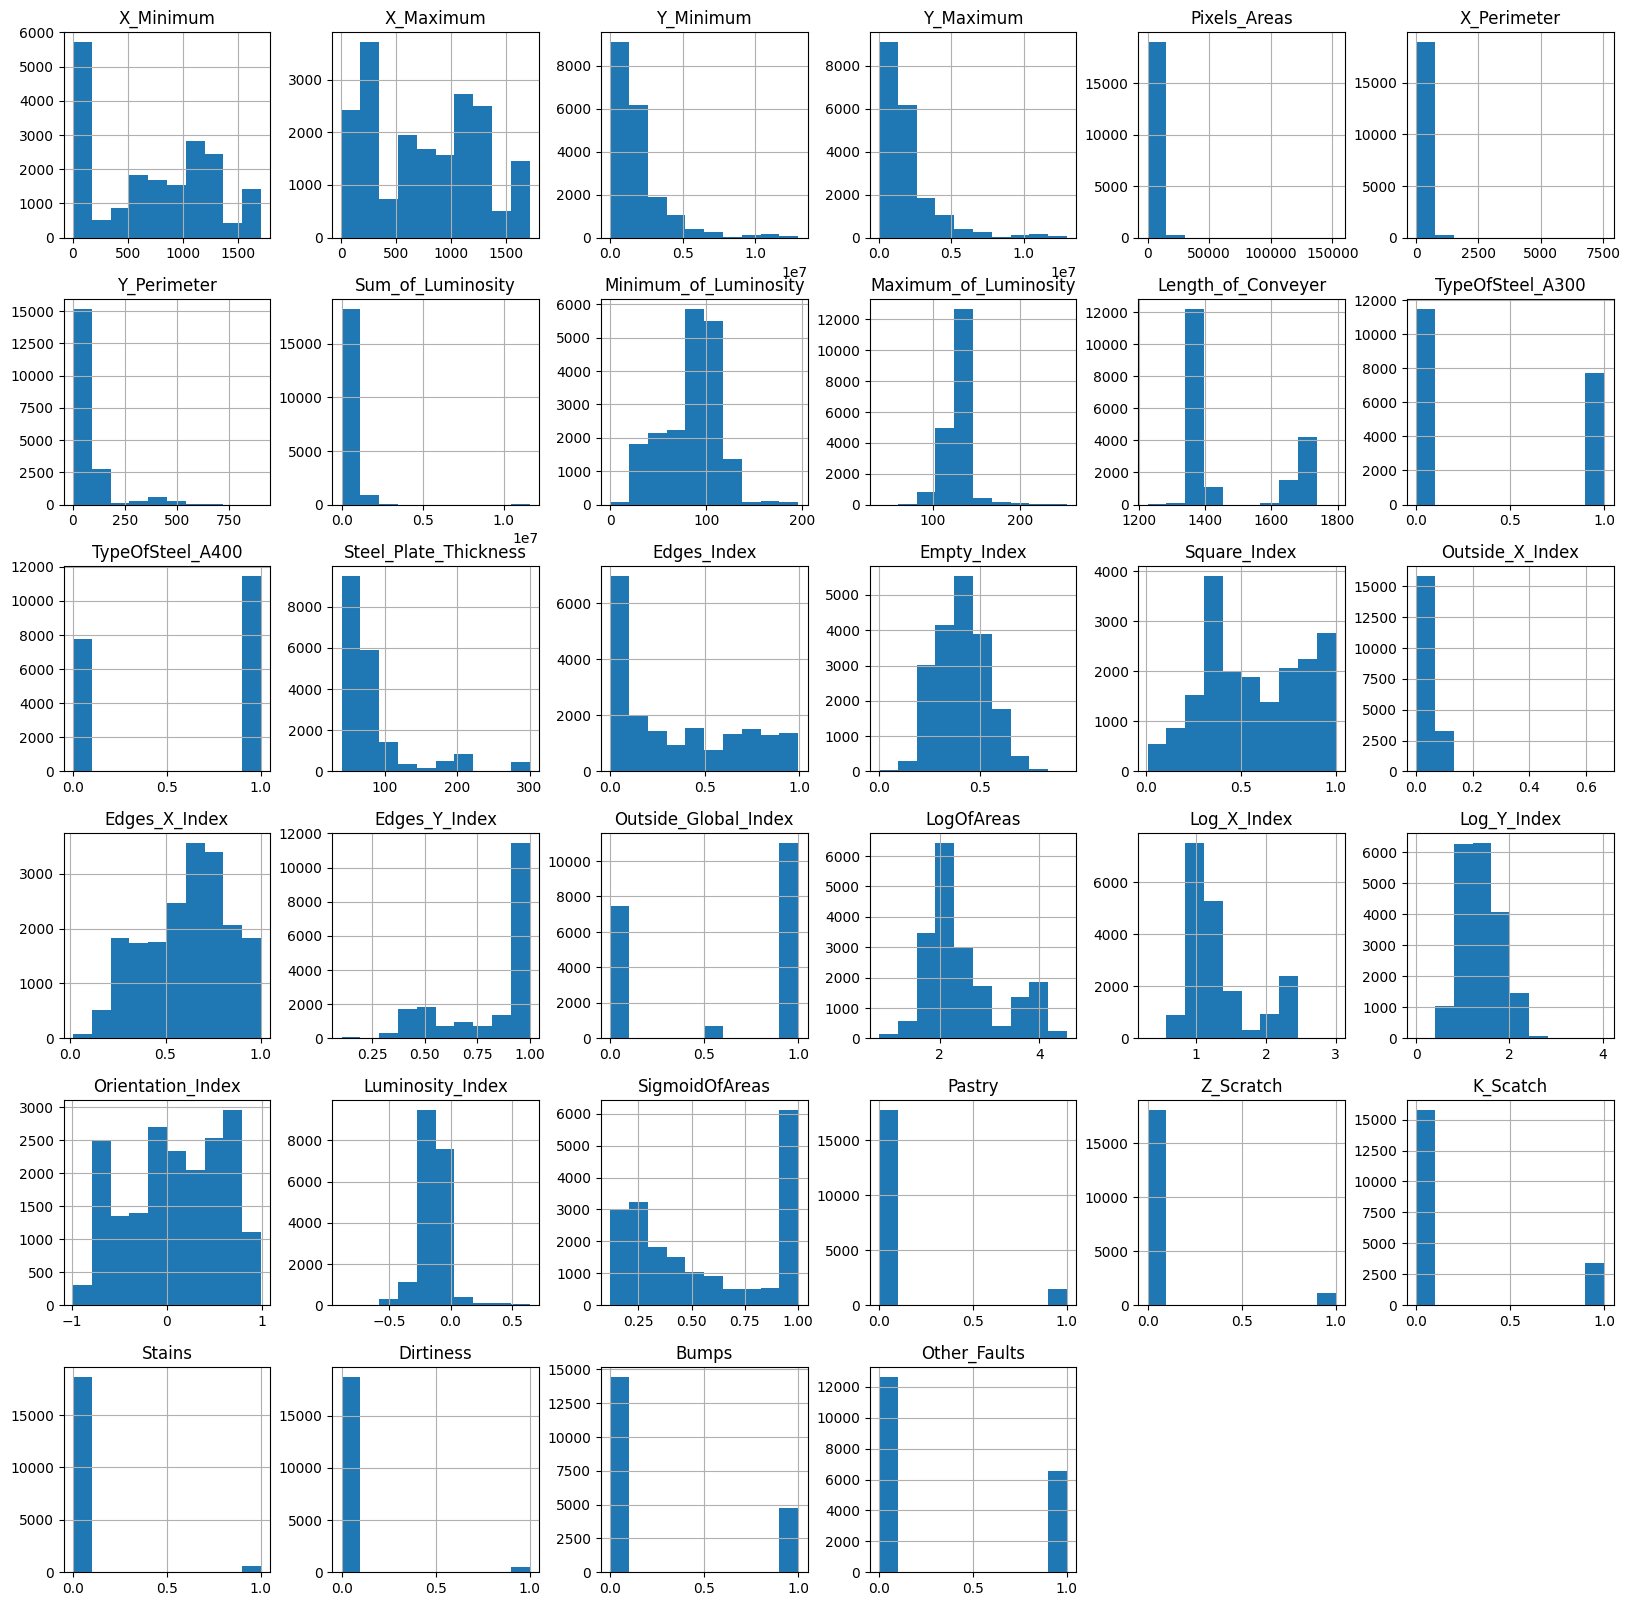

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_cols = [i for i in df.columns.tolist() if i not in target_cols]
print(feature_cols)

# Just a histogram of every column including targets
df.hist(figsize=(20,20))
plt.show()

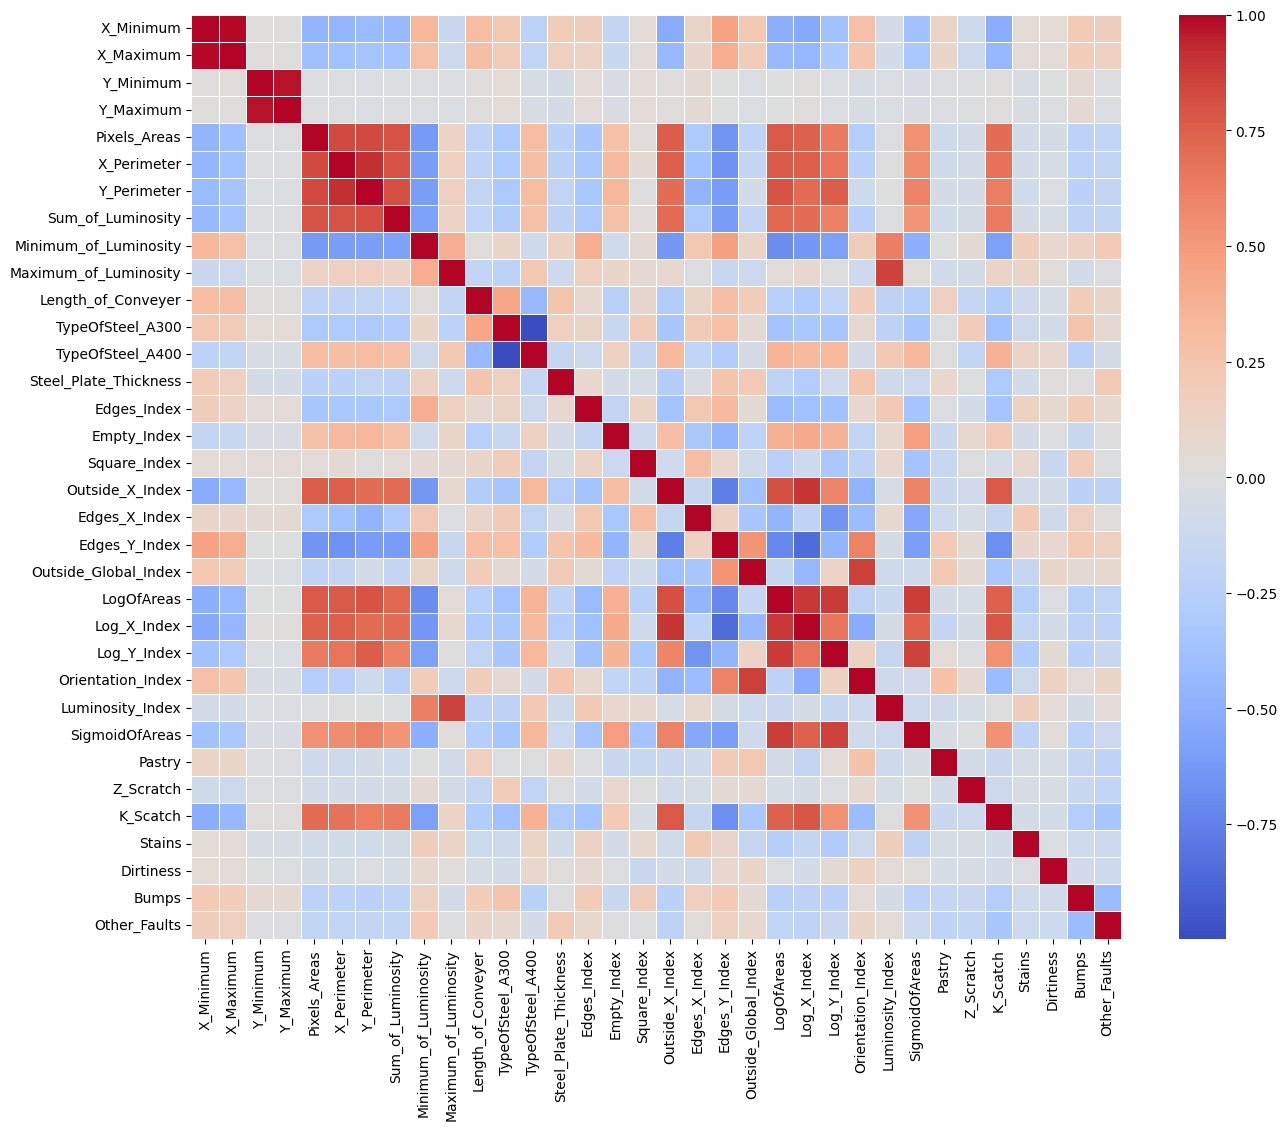

In [38]:
# Start with a correlation check to visualise which features have relationships with others.
plt.figure(figsize=(15,12))  
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

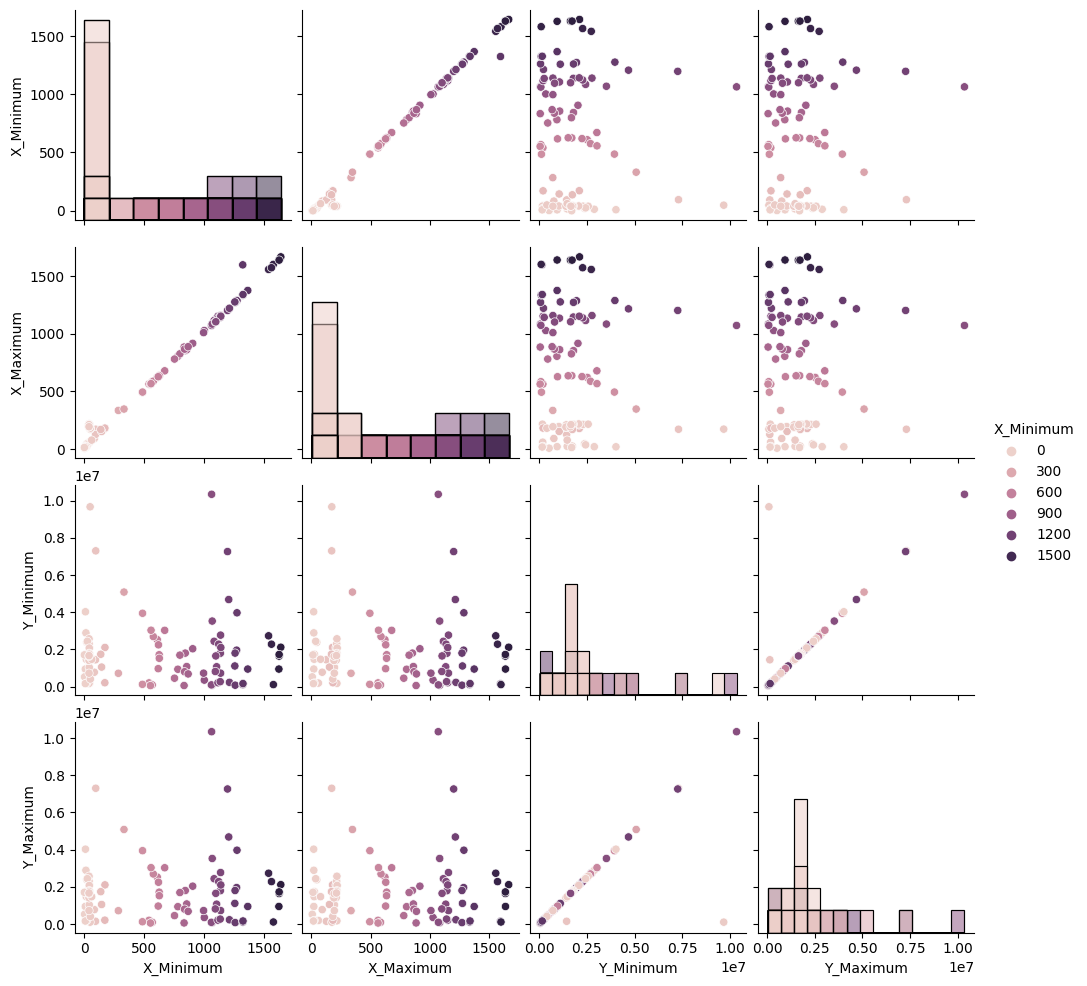

In [39]:
# From the heatmap we can tell which features show correlation.
# We can use these features in a pair plot to refine our understanding.
hot_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum']

dfsample = df.sample(100)
sns.pairplot(dfsample,
             hue='X_Minimum',
             #palette="Accent",
            diag_kind="hist",
             x_vars=['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum'],
             y_vars=['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum']
            )


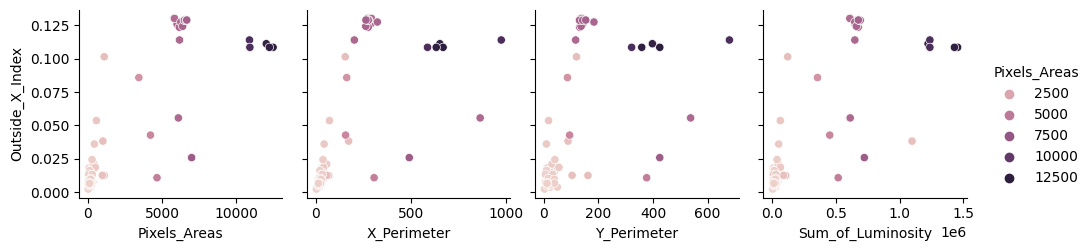

In [41]:
#                'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
#                'Maximum_of_Luminosity','Outside_X_Index', 'Outside_Gobal_Index','LogOfAreas',
#                'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 
#                'SigmoidOfAreas', 'K_Scatch' ]
sns.pairplot(dfsample,
            hue= 'Pixels_Areas',
            diag_kind='hist',
            x_vars=['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity'],
            y_vars=['Outside_X_Index'])

## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [42]:
# Clean up dulpicate and zero output rows

# define rows w/ no defect and rows w/ 2 defects
zero_rows = df[df[target_cols].sum(axis=1)==0].index
multi_rows = df[df[target_cols].sum(axis=1)>1].index

# drop zero rows from df
df.drop(zero_rows, axis=0, inplace=True)
#drop multi defect rows from df
df.drop(multi_rows, axis=0, inplace=True)

# Reset the index
df.reset_index(inplace=True, drop=True)

In [63]:
# Create new column called Defect that collapses the seven columns of defect class one hot encoding into a single column.
df['Defect'] = df[target_cols].idxmax(axis=1)

# Check that it worked
df[target_cols+['Defect']].head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Defect
0,0,0,0,1,0,0,0,Stains
1,0,0,0,0,0,0,1,Other_Faults
2,0,0,1,0,0,0,0,K_Scatch
3,0,0,1,0,0,0,0,K_Scatch
4,0,0,0,0,0,0,1,Other_Faults


In [53]:
core_features = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 
                 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 
                 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 
                 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 
                 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 
                 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'
                ]
dfsample[core_features]

,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
1093,70,15,10,8586,95,124,1690,1,0,70,...,0.0089,0.8000,1.0000,0.0,1.8451,1.0792,1.0000,-0.4000,-0.1671,0.2469
4196,352,28,32,41476,30,84,1688,0,1,300,...,0.0081,0.6429,1.0000,1.0,2.5478,1.0414,1.5051,0.8082,-0.5291,0.7822
16283,69,33,14,8140,104,127,1627,1,0,100,...,0.0184,0.7576,0.6429,0.0,1.8389,1.3979,0.9542,-0.6786,-0.0958,0.2040
1368,1006,173,89,1098162,84,127,1356,1,0,70,...,0.0382,0.5687,0.4894,1.0,3.0128,1.7160,1.7853,0.5152,-0.1557,1.0000
12647,61,29,12,6481,108,125,1356,1,0,70,...,0.0178,0.8276,0.7500,0.0,1.7853,1.3802,0.9542,-0.6250,-0.0767,0.3601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,10941,588,322,1238454,30,140,1402,0,1,40,...,0.1086,0.2553,0.4578,1.0,4.0391,2.1818,2.2095,0.0679,-0.1033,1.0000
4627,6676,264,154,675659,43,124,1358,0,1,40,...,0.1291,0.6757,0.5114,0.0,3.8247,2.2430,1.8261,-0.6154,-0.1943,1.0000
13488,6185,203,117,648220,36,124,1356,0,1,40,...,0.1141,0.7346,0.5385,0.0,3.7911,2.1903,1.8692,-0.6114,-0.2099,1.0000


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.5 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.6 µs


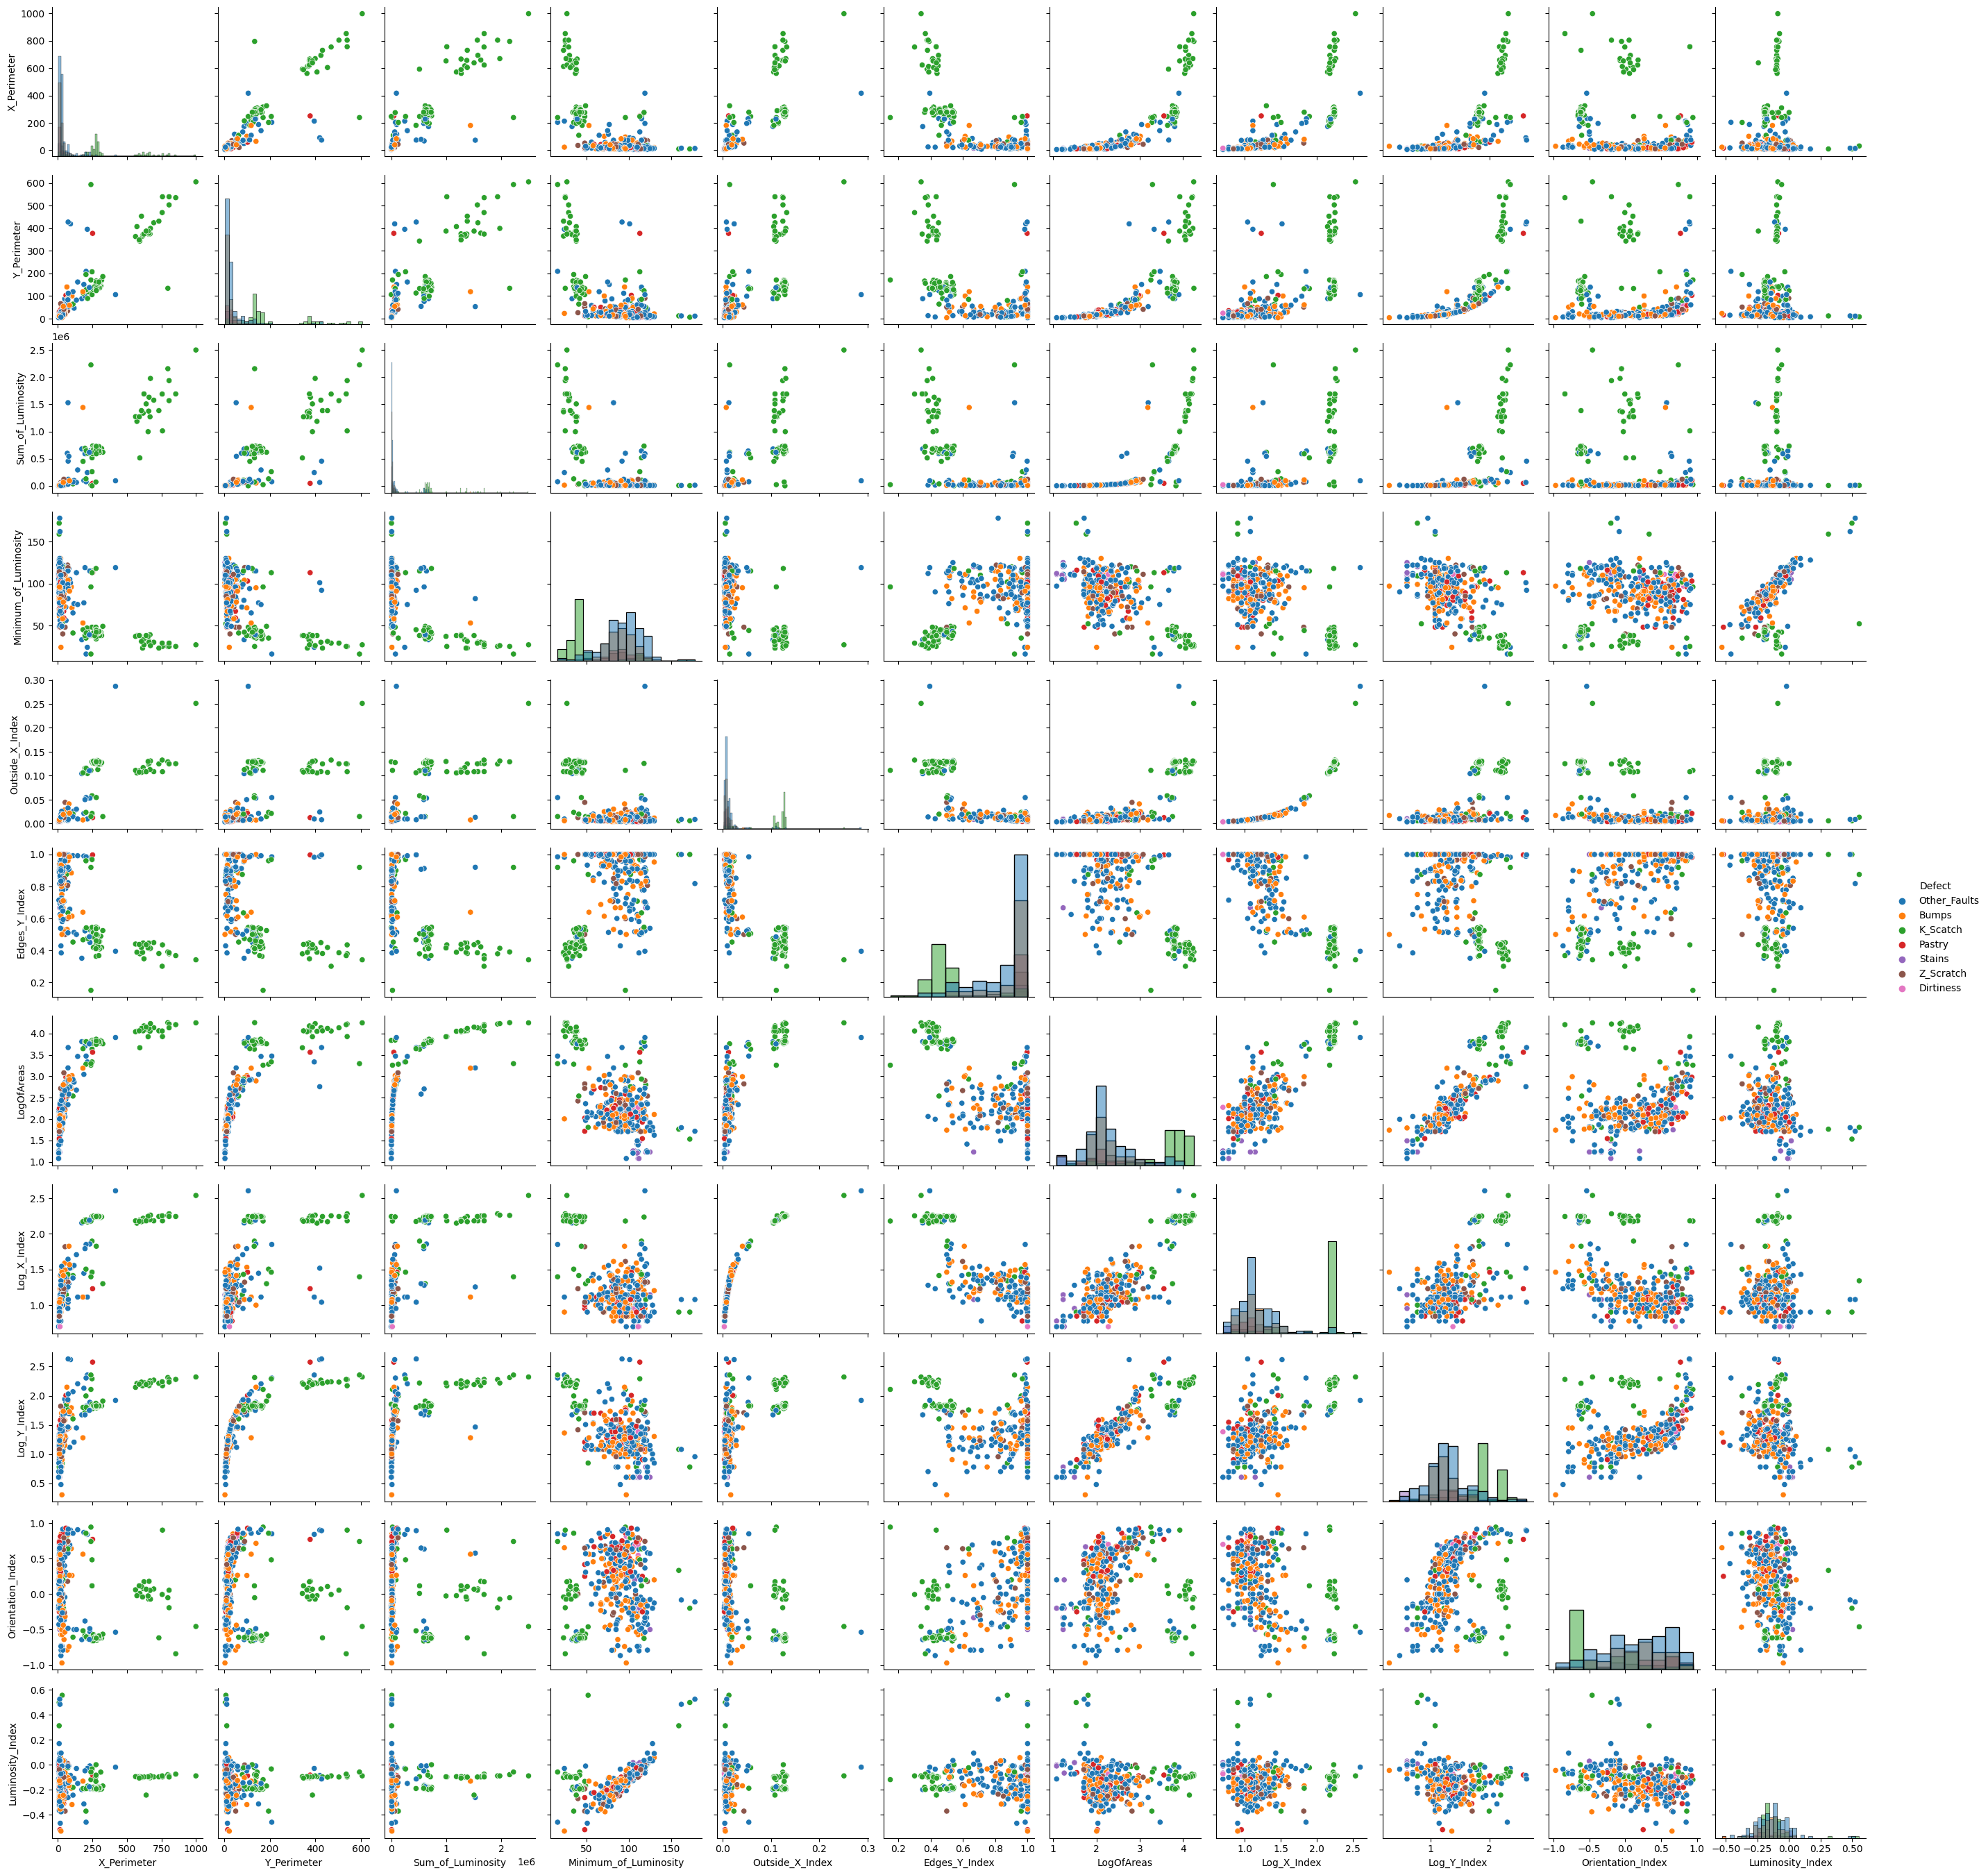

In [65]:
# Get some further visualization
dfsample = df.sample(400)
%time
sns.pairplot(dfsample,
             hue='Defect',
             palette="tab10",
            diag_kind="hist",
             x_vars=['X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Outside_X_Index',
                     'Edges_Y_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index',
                     'Luminosity_Index'],
             y_vars=['X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Outside_X_Index',
                     'Edges_Y_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index',
                     'Luminosity_Index'],
            )
%time

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm for now. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.

### Apply ML to the challenge test set

